In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
car=pd.read_csv('quikr_car.csv')

In [72]:
car.head(10)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
5,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,Ask For Price,"59,000 kms",Diesel
6,Ford Figo,Ford,2012,"1,75,000","41,000 kms",Diesel
7,Hyundai Eon,Hyundai,2013,"1,90,000","25,000 kms",Petrol
8,Ford EcoSport Ambiente 1.5L TDCi,Ford,2016,"8,30,000","24,530 kms",Diesel
9,Maruti Suzuki Alto K10 VXi AMT,Maruti,2015,"2,50,000","60,000 kms",Petrol


In [73]:
df = car

In [74]:
df.shape

(892, 6)

We remove irrelevant columns to avoid noise and redundancy, ensuring the model focuses on features that contribute meaningful insights for prediction.

The name column is irrelevant because it will not contribute meaningful patterns to the prediction.

In [75]:
df.drop(columns="name",inplace=True)

now we are checking the features datatype 

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   company     892 non-null    object
 1   year        892 non-null    object
 2   Price       892 non-null    object
 3   kms_driven  840 non-null    object
 4   fuel_type   837 non-null    object
dtypes: object(5)
memory usage: 35.0+ KB


The data types of the columns are currently set as objects (strings). We need to convert year, Price, and kms_driven to integer type for numerical analysis and model training, as they contain numerical data in string format. Converting them to integers will allow the model to properly interpret and use these features for prediction.

In [77]:
df

,company,year,Price,kms_driven,fuel_type
0,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...
887,Tara,zest,"3,10,000",NaN,NaN
888,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda,2014,"1,80,000",Petrol,NaN


In [78]:
ask_for_price_rows = df[df['Price'] == 'Ask For Price']
print(ask_for_price_rows)

        company  year          Price    kms_driven fuel_type
2        Maruti  2018  Ask For Price    22,000 kms    Petrol
5          Ford  2015  Ask For Price    59,000 kms    Diesel
69            I  2017  Ask For Price           NaN       NaN
85            I  2017  Ask For Price           NaN       NaN
138      Maruti  2018  Ask For Price    28,028 kms    Petrol
185  Commercial   ...  Ask For Price           NaN       NaN
286  Commercial   ...  Ask For Price           NaN       NaN
295      Maruti  2010  Ask For Price    52,000 kms    Diesel
304        Tata  2017  Ask For Price    84,000 kms    Diesel
360     selling  Zest  Ask For Price           NaN       NaN
368        Tata  /-Rs  Ask For Price           NaN       NaN
388      Maruti  2018  Ask For Price    24,000 kms    Petrol
449      Maruti  2011  Ask For Price    16,000 kms    Petrol
503     Hyundai  2015  Ask For Price  1,80,000 kms    Diesel
511     Hyundai  2015  Ask For Price    35,000 kms    Petrol
524      Toyota  2009  A

When the Price is "Ask For Price," other columns often contain missing or inconsistent values, indicating incomplete or unreliable data, so it's best to drop those rows.

In [79]:
df = df[df['Price'] != 'Ask For Price']
df['Price'] = df['Price'].str.replace(',', '').astype(int)  # Remove commas and convert to int

C:\Users\HP\AppData\Local\Temp\ipykernel_16644\2264934367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].str.replace(',', '').astype(int)  # Remove commas and convert to int


In [80]:
df.sample(3)

,company,year,Price,kms_driven,fuel_type
867,Mahindra,2013,325000,"63,000 kms",Diesel
813,Tata,2013,60000,"7,000 kms",Petrol
119,Maruti,2013,399999,"33,000 kms",Diesel


In [81]:


df["Price"].value_counts()

Price
250000     17
350000     14
180000     13
400000     12
130000     12
           ..
749999      1
1130000     1
1074999     1
324999      1
500001      1
Name: count, Length: 273, dtype: int64

In [82]:
df.shape

(857, 5)

In [83]:

df.isnull().sum()

company        0
year           0
Price          0
kms_driven    38
fuel_type     41
dtype: int64

There are null values in the kms_driven column, which is preventing us from removing the "kms" word. Therefore, we will first fill the missing values with the mode, and do the same for the fuel_type column.








In [84]:
df["kms_driven"]

0      45,000 kms
1          40 kms
3      28,000 kms
4      36,000 kms
6      41,000 kms
          ...    
887           NaN
888    27,000 kms
889    40,000 kms
890        Petrol
891        Petrol
Name: kms_driven, Length: 857, dtype: object

In [85]:

# Remove non-numeric characters and replace them with NaN if the result is empty
df['kms_driven'] = df['kms_driven'].str.replace(r'\D', '', regex=True)
df['kms_driven'] = pd.to_numeric(df['kms_driven'], errors='coerce')  # Convert to numeric, setting errors as NaN

# Fill NaN values with the mode (or another method if needed)
df['kms_driven'].fillna(df['kms_driven'].mode()[0], inplace=True)

# Convert to integer
df['kms_driven'] = df['kms_driven'].astype(int)

C:\Users\HP\AppData\Local\Temp\ipykernel_16644\3389097855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kms_driven'] = df['kms_driven'].str.replace(r'\D', '', regex=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_16644\3389097855.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kms_driven'] = pd.to_numeric(df['kms_driven'], errors='coerce')  # Convert to numeric, setting errors as NaN
C:\Users\HP\AppData\Local\Temp\ipykernel_16644\3389097855.py:6: FutureWarning: A value is trying to be set o

In [86]:
df["Price"]

0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
887    310000
888    260000
889    390000
890    180000
891    160000
Name: Price, Length: 857, dtype: int32

In [87]:
df.shape

(857, 5)

In [88]:

df["fuel_type"].isnull().sum()

41

In [89]:
df["fuel_type"].value_counts()

fuel_type
Petrol    428
Diesel    386
LPG         2
Name: count, dtype: int64


The fuel_type column still contains null values, which will be filled using the mode. Additionally, any rows with the value "LPG" in the fuel_type column will be dropped.

We are dropping the "LPG" values because it appears in only 2 rows, and it won't contribute much to the model.








In [90]:
df['fuel_type'] = df['fuel_type'].fillna(df['fuel_type'].mode()[0])

df = df[df['fuel_type'] != 'LPG']

C:\Users\HP\AppData\Local\Temp\ipykernel_16644\3922720343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fuel_type'] = df['fuel_type'].fillna(df['fuel_type'].mode()[0])


In [91]:
df.isnull().sum()

company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

In [92]:
df.head()

,company,year,Price,kms_driven,fuel_type
0,Hyundai,2007,80000,45000,Petrol
1,Mahindra,2006,425000,40,Diesel
3,Hyundai,2014,325000,28000,Petrol
4,Ford,2014,575000,36000,Diesel
6,Ford,2012,175000,41000,Diesel


In [93]:
df.shape

(855, 5)


First, we will create a box plot for the Price and kms_driven columns. If there are any outliers, we will remove them using the IQR (Interquartile Range) method.

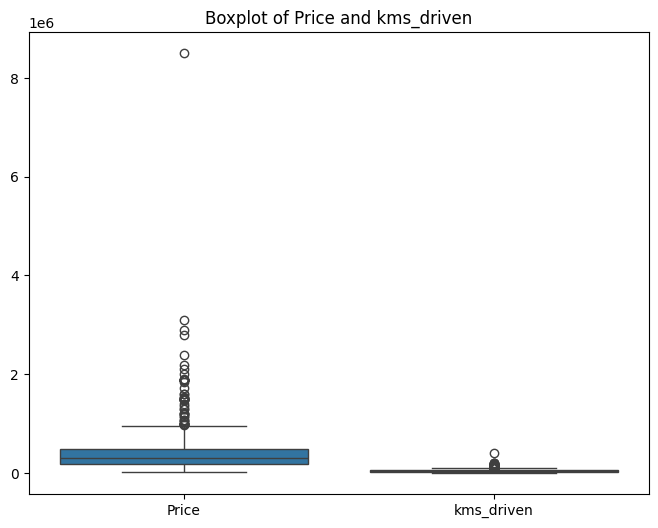

In [94]:
# Create a box plot for both 'Price' and 'kms_driven'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Price', 'kms_driven']])
plt.title('Boxplot of Price and kms_driven')
plt.show()

In [95]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1_price = df['Price'].quantile(0.25)
Q3_price = df['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

Q1_kms = df['kms_driven'].quantile(0.25)
Q3_kms = df['kms_driven'].quantile(0.75)
IQR_kms = Q3_kms - Q1_kms

# Define the lower and upper bounds for Price and kms_driven to filter out outliers
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

lower_bound_kms = Q1_kms - 1.5 * IQR_kms
upper_bound_kms = Q3_kms + 1.5 * IQR_kms

# Filter the dataframe to remove outliers
df = df[(df['Price'] >= lower_bound_price) & (df['Price'] <= upper_bound_price) &
                 (df['kms_driven'] >= lower_bound_kms) & (df['kms_driven'] <= upper_bound_kms)]

# Display the filtered dataframe
df.head()

,company,year,Price,kms_driven,fuel_type
0,Hyundai,2007,80000,45000,Petrol
1,Mahindra,2006,425000,40,Diesel
3,Hyundai,2014,325000,28000,Petrol
4,Ford,2014,575000,36000,Diesel
6,Ford,2012,175000,41000,Diesel


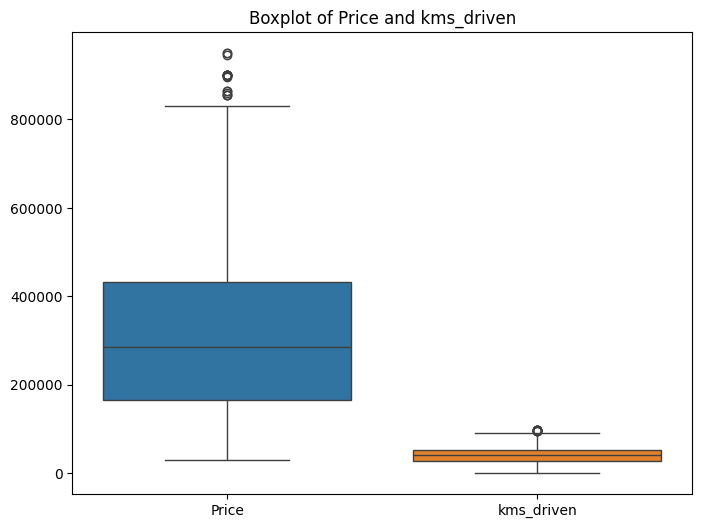

In [96]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Price', 'kms_driven']])
plt.title('Boxplot of Price and kms_driven')
plt.show()

Now, we want to explore the relationship between the target column and other columns, so we will perform EDA. First, we'll filter the companies with counts greater than 2 and then examine the relationship between these companies and the Price column.

C:\Users\HP\AppData\Local\Temp\ipykernel_16644\3259707456.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtered_sorted, x='company', y='Price', palette='viridis')


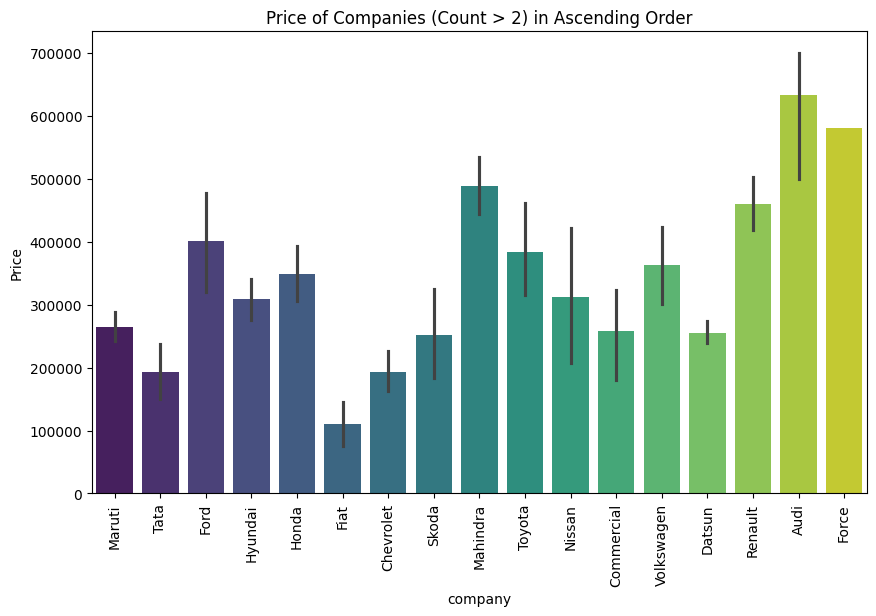

In [97]:
# Count the occurrences of each company
company_counts = df['company'].value_counts()

# Filter companies with counts greater than 2
companies_above_2 = company_counts[company_counts > 2].index

# Filter the dataframe for those companies
df_filtered = df[df['company'].isin(companies_above_2)]

# Sort by 'Price' in ascending order
df_filtered_sorted = df_filtered.sort_values(by='Price', ascending=True)

# Plot the barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_filtered_sorted, x='company', y='Price', palette='viridis')
plt.xticks(rotation=90)
plt.title('Price of Companies (Count > 2) in Ascending Order')
plt.show()


there is something linear relation between them , so it relevt to have company 

In [98]:
valid_years = df["year"].value_counts()[df["year"].value_counts() >= 4].index
df_filtered = df[df["year"].isin(valid_years)]

In [99]:
df = df_filtered

The values below 4 were text, which had no meaningful contribution, so they were deleted.

In [100]:
df.shape

(711, 5)

In [101]:
df["year"].value_counts()

year
2015    94
2014    86
2013    77
2012    67
2011    53
2016    53
2009    52
2017    49
2010    40
2018    26
2006    22
2007    17
2008    15
2019    14
2005    12
2003    10
2004     9
2000     6
2001     5
2002     4
Name: count, dtype: int64

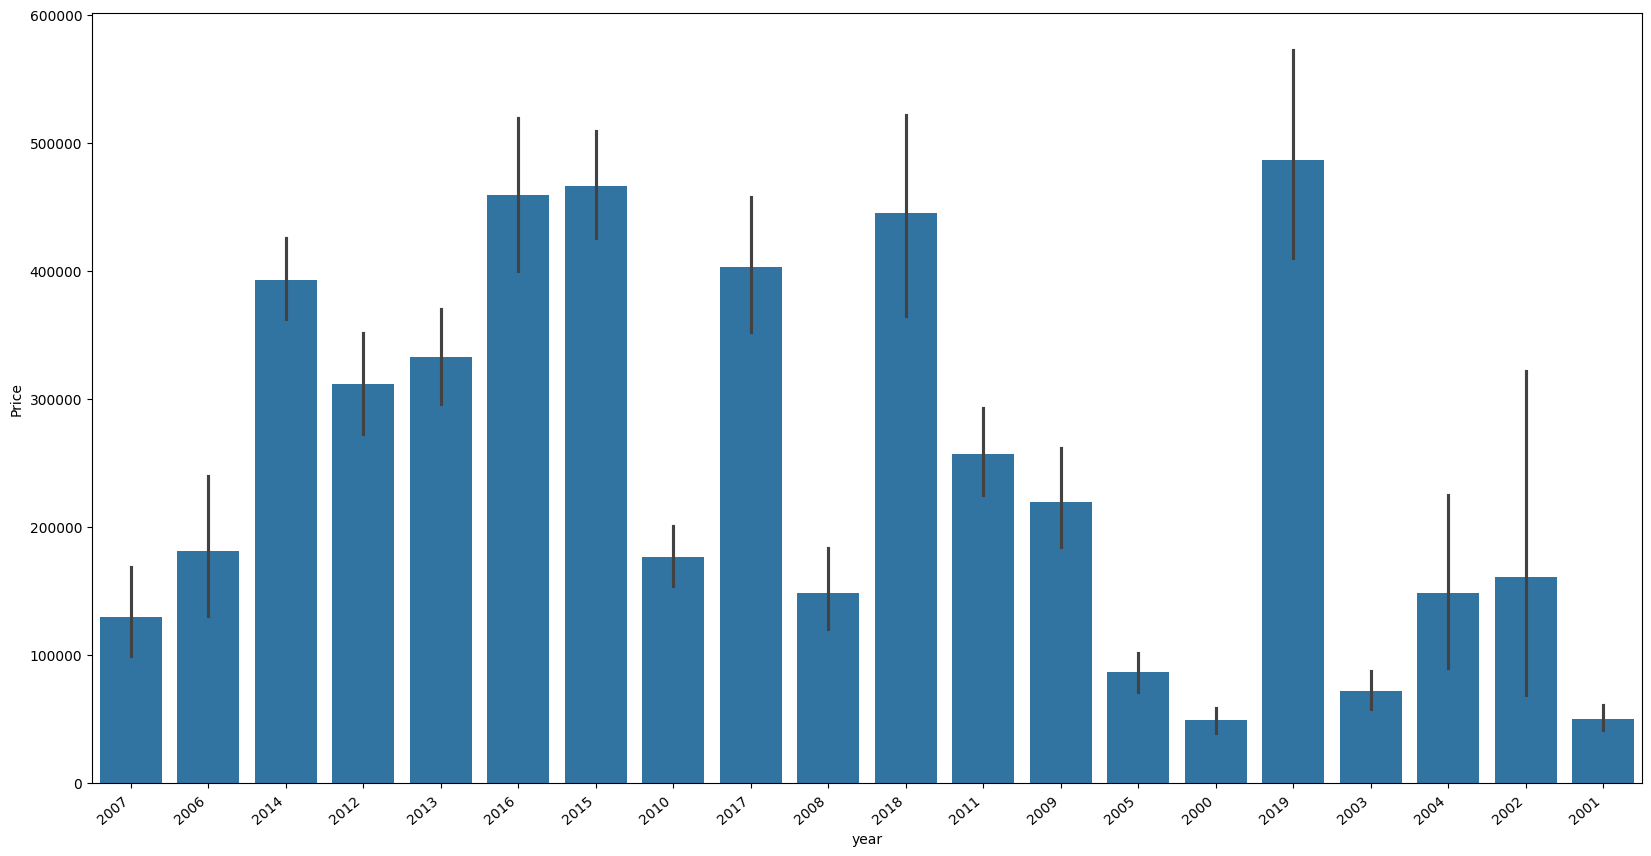

In [102]:
plt.figure(figsize=(20, 10))
sns.barplot(x='year', y='Price', data=df)
plt.xticks(rotation=40, ha='right')
plt.show()

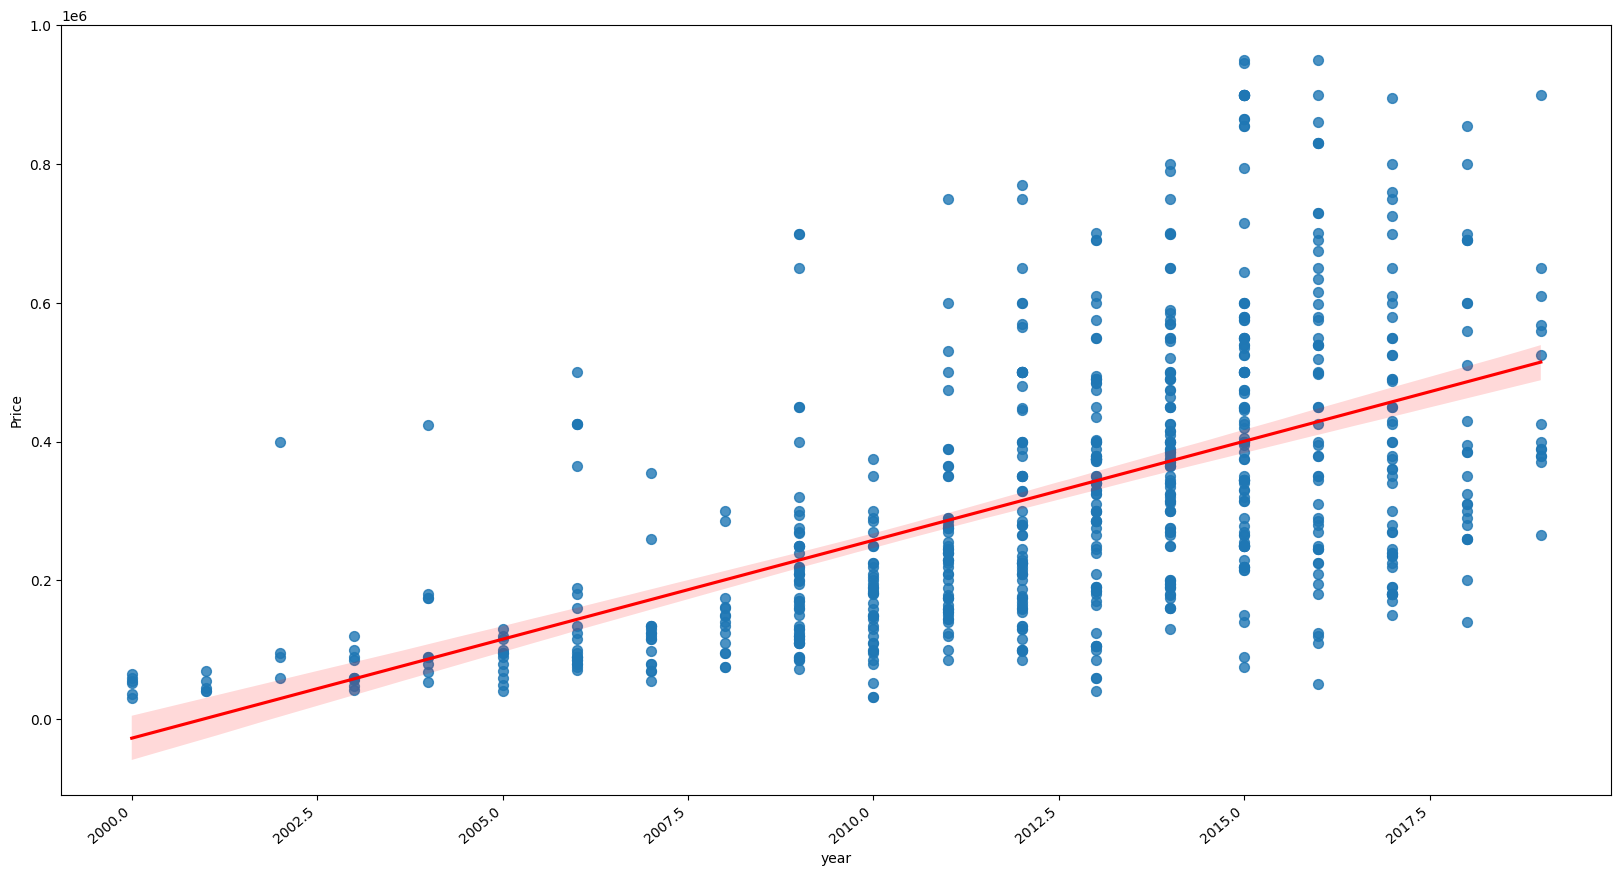

In [103]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

plt.figure(figsize=(20, 10))
sns.regplot(x='year', y='Price', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.xticks(rotation=40, ha='right')
plt.show()

There seems to be a linear relationship between the year and Price, meaning that if the car's purchase year is closer to the current year, its price tends to be higher. This is because newer cars generally have a higher resale price, while older cars have a lower price due to depreciation.

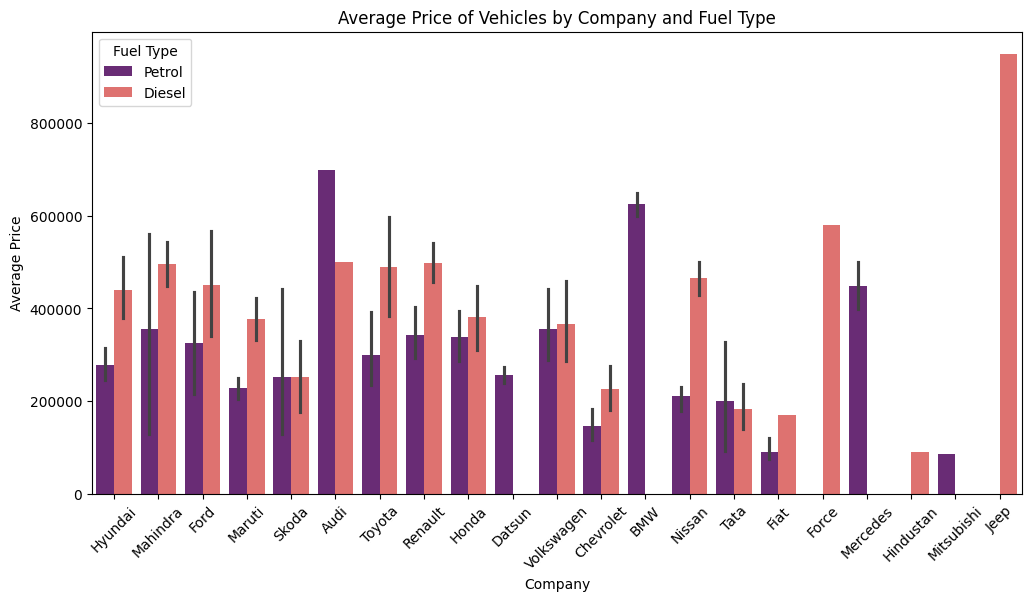

In [104]:
# Plotting the bar chart for average price per company and fuel type
plt.figure(figsize=(12, 6))
sns.barplot(x="company", y="Price", hue="fuel_type", data=df, estimator=lambda x: sum(x)/len(x), palette="magma")

# Labels aur title add karein
plt.title("Average Price of Vehicles by Company and Fuel Type")
plt.xlabel("Company")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.legend(title="Fuel Type")

# Show karein
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_16644\3407075142.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fuel_type', data=df, palette='viridis')


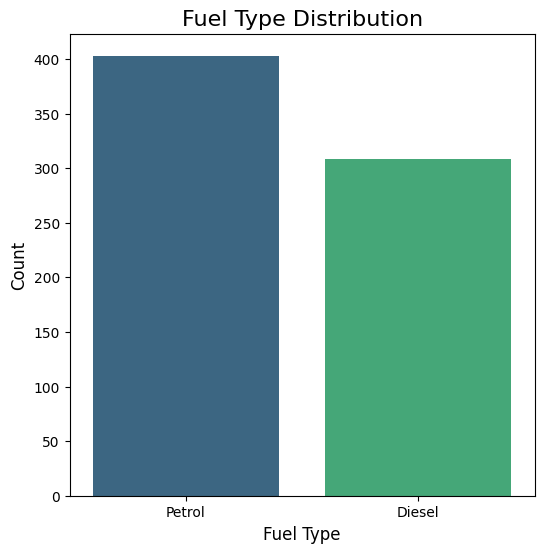

In [105]:
# Univariate Analysis for Fuel Type
plt.figure(figsize=(6, 6))
sns.countplot(x='fuel_type', data=df, palette='viridis')
plt.title('Fuel Type Distribution', fontsize=16)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_16644\2162700739.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fuel_type', y='Price', data=df, palette='coolwarm')


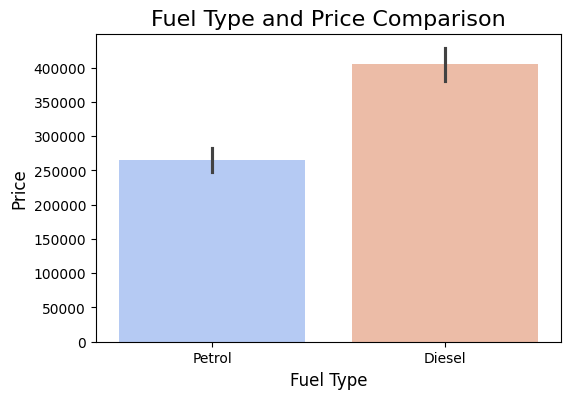

In [106]:
plt.figure(figsize=(6, 4))
sns.barplot(x='fuel_type', y='Price', data=df, palette='coolwarm')
plt.title('Fuel Type and Price Comparison', fontsize=16)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

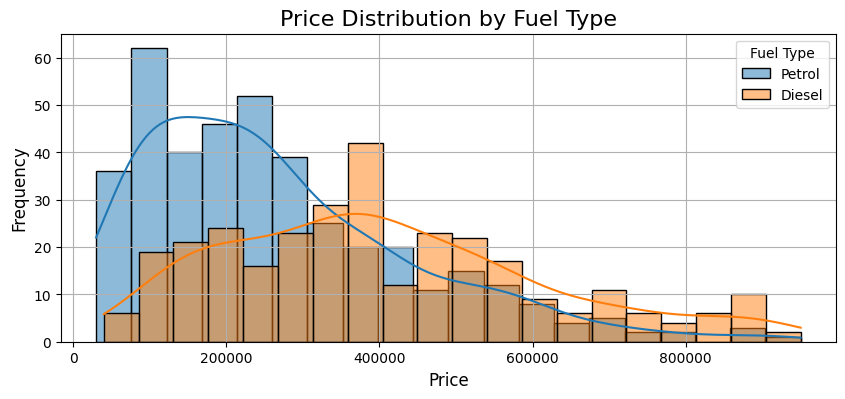

In [107]:
plt.figure(figsize=(10, 4))
for fuel in df['fuel_type'].unique():
    sns.histplot(df[df['fuel_type'] == fuel]['Price'], label=fuel, kde=True, bins=20)

# Customize the plot
plt.title("Price Distribution by Fuel Type", fontsize=16)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="Fuel Type")
plt.grid(True)
plt.show()

Diesel cars have higher prices while petrol cars are more common and affordable, making them a popular choice This indicates that whenever the fuel type is diesel, there is a chances of a higher price.

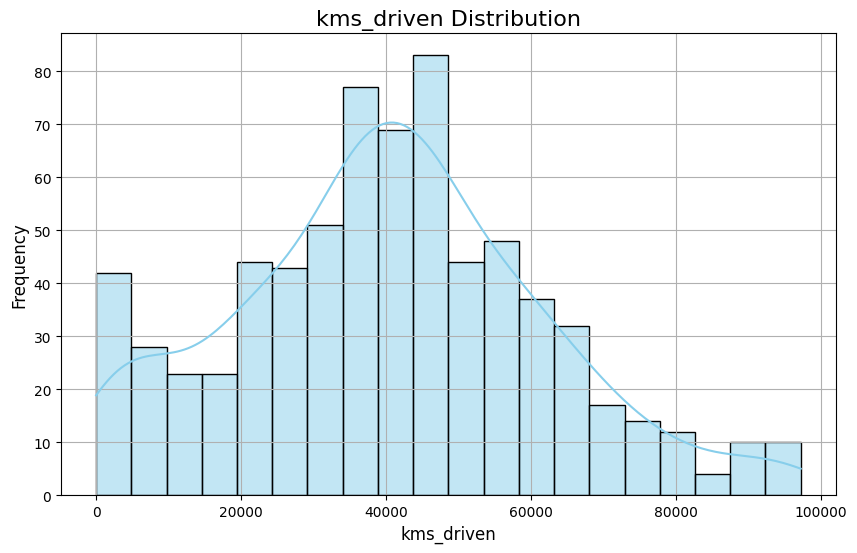

In [108]:
# Univariate Analysis for kms_driven
plt.figure(figsize=(10, 6))
sns.histplot(df['kms_driven'], kde=True, bins=20, color='skyblue')
plt.title('kms_driven Distribution', fontsize=16)
plt.xlabel('kms_driven', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

,year,Price,kms_driven
year,1.000000,0.549433,-0.388979
Price,0.549433,1.000000,-0.159165
kms_driven,-0.388979,-0.159165,1.000000


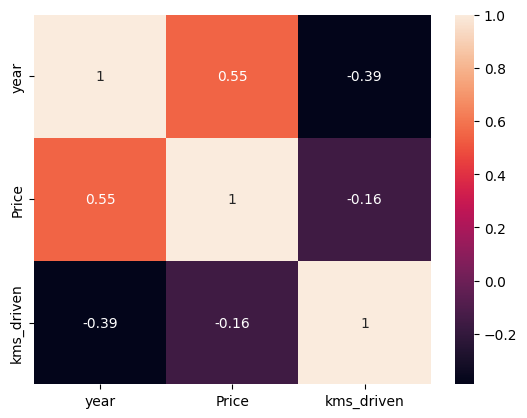

In [109]:
numeric_cols =  df.select_dtypes(include=['number']).columns
sns.heatmap(df[numeric_cols].corr() , annot=True)
df[numeric_cols].corr()


The price has a lower correlation with kms_driven, while the correlation with year is higher. Both year and kms_driven are independent columns, and there is no significant correlation between them. This makes sense because if someone buys a car recently, the kms_driven will be lower, and if the car is older, the kms_driven will be higher. However, both year and kms_driven do not show a direct relationship with each other. Since year represents the age of the car and kms_driven represents its usage, both should be retained, even though kms_driven will have a minimal impact on predicting the price.

#feature engineering

In [110]:
df.head()

,company,year,Price,kms_driven,fuel_type
0,Hyundai,2007,80000,45000,Petrol
1,Mahindra,2006,425000,40,Diesel
3,Hyundai,2014,325000,28000,Petrol
4,Ford,2014,575000,36000,Diesel
6,Ford,2012,175000,41000,Diesel


In [111]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Encoding 'company' and 'fuel_type' columns using OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_columns = encoder.fit_transform(df[['company', 'fuel_type']])

# Convert to DataFrame and assign proper column names
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['company', 'fuel_type']))

scaler = StandardScaler()
scaled_columns = scaler.fit_transform(df[['Price' ,'kms_driven']])
scaled_df = pd.DataFrame(scaled_columns, columns=['Price_scaled','kms_driven_scaled'])

# Binning the 'year' column into categories (e.g., 2000-2010, 2011-2020)
df['year_binned'] = pd.cut(df['year'], bins=[2000, 2010, 2020], labels=['2000-2010', '2011-2020'], right=False)

# Encoding 'year_binned' using OneHotEncoder
year_encoder = OneHotEncoder(drop='first', sparse_output=False)
year_encoded = year_encoder.fit_transform(df[['year_binned']])

# Convert to DataFrame and assign proper column names
year_encoded_df = pd.DataFrame(year_encoded, columns=year_encoder.get_feature_names_out(['year_binned']))

# Concatenating the encoded and scaled data with the original DataFrame
df = pd.concat([df.drop(['company', 'fuel_type', 'kms_driven', 'year', 'year_binned'], axis=1),
                encoded_df, scaled_df, year_encoded_df], axis=1)

In this code, we apply one-hot encoding to the company and fuel_type columns, scale the Price and kms_driven columns using StandardScaler, and bin the year column into predefined ranges (e.g., 2001-2010, 2011-2020). The transformed columns are then concatenated with the original dataframe, dropping the original company, fuel_type, Price, and kms_driven columns.

In [112]:
df.head(10)

,Price,company_BMW,company_Chevrolet,company_Datsun,company_Fiat,company_Force,company_Ford,company_Hindustan,company_Honda,company_Hyundai,...,company_Nissan,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,fuel_type_Petrol,Price_scaled,kms_driven_scaled,year_binned_2011-2020
0,80000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.210999,0.219293,0.0
1,425000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.490533,-1.883132,0.0
3,325000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.230330,-0.201566,1.0
4,575000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.742461,0.032245,1.0
6,175000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.487985,-0.737928,1.0
7,190000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.372563,0.920725,1.0
8,830000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.707938,0.920725,1.0
9,250000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.051984,-0.482139,1.0
10,182000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.441214,-0.388615,1.0
11,315000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.027324,0.390442,1.0


In [113]:
df = df.dropna()

In [114]:
df = df.drop(["Price"] , axis=1)

In [115]:
df.head()

,company_BMW,company_Chevrolet,company_Datsun,company_Fiat,company_Force,company_Ford,company_Hindustan,company_Honda,company_Hyundai,company_Jeep,...,company_Nissan,company_Renault,company_Skoda,company_Tata,company_Toyota,company_Volkswagen,fuel_type_Petrol,Price_scaled,kms_driven_scaled,year_binned_2011-2020
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.210999,0.219293,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.490533,-1.883132,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.230330,-0.201566,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.742461,0.032245,1.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.487985,-0.737928,1.0


Now, we will start by building a model using linear regression, evaluate its performance, and perform further checks to assess its effectiveness.

model building

In [116]:
#First, we will separate the features (X) and the target variable (y). The target variable Price_scaled will be assigned to y, and the remaining columns will be assigned to X.

In [117]:
X = df.drop('Price_scaled', axis=1)  
y = df['Price_scaled']  

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on training data
y_train_pred = model.predict(X_train)

# R² score
r2_train = model.score(X_train, y_train)

# Adjusted R²
n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = 1 - (1 - r2_train) * (n - 1) / (n - p - 1)

# RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

r2_train, adjusted_r2_train, rmse_train

(0.4309857320002499, 0.4012418043548085, 0.7473452760252666)

In [120]:
from sklearn.metrics import r2_score, mean_squared_error
# Predicting on test data
y_pred_test = model.predict(X_test)

# Calculating R² for test data
r2_test = r2_score(y_test, y_pred_test)

# Calculating Adjusted R² for test data
n = len(y_test)
p = X_test.shape[1]
adjusted_r2_test = 1 - (1 - r2_test) * (n - 1) / (n - p - 1)

# Calculating RMSE for test data
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Displaying the results
print(f"Test R²: {r2_test}")
print(f"Test Adjusted R²: {adjusted_r2_test}")
print(f"Test RMSE: {rmse_test}")

Test R²: 0.49551112461922586
Test Adjusted R²: 0.37074505866484087
Test RMSE: 0.7038222212911889


In [121]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
base_model = DecisionTreeRegressor(max_depth=5)

# Initialize AdaBoost Regressor
ada_model = AdaBoostRegressor(estimator=base_model , n_estimators=1000, learning_rate=0.1 )

# Train the AdaBoost model on the training data
ada_model.fit(X_train, y_train)

# Predicting on training data
y_pred_train_ada = ada_model.predict(X_train)

# Calculating R² for training data
r2_train_ada = r2_score(y_train, y_pred_train_ada)

# Calculating Adjusted R² for training data
n_train = len(y_train)
p_train = X_train.shape[1]
adjusted_r2_train_ada = 1 - (1 - r2_train_ada) * (n_train - 1) / (n_train - p_train - 1)

# Calculating RMSE for training data
rmse_train_ada = np.sqrt(mean_squared_error(y_train, y_pred_train_ada))

# Displaying the results
print(f"Training R² (AdaBoost): {r2_train_ada}")
print(f"Training Adjusted R² (AdaBoost): {adjusted_r2_train_ada}")
print(f"Training RMSE (AdaBoost): {rmse_train_ada}")

Training R² (AdaBoost): 0.5266431485681577
Training Adjusted R² (AdaBoost): 0.5018994949705842
Training RMSE (AdaBoost): 0.681638401366918


In [122]:
# Predicting on test data
y_pred_test_ada = ada_model.predict(X_test)

# Calculating R² for test data
r2_test_ada = r2_score(y_test, y_pred_test_ada)

# Calculating Adjusted R² for test data
n_test = len(y_test)
p_test = X_test.shape[1]
adjusted_r2_test_ada = 1 - (1 - r2_test_ada) * (n_test - 1) / (n_test - p_test - 1)

# Calculating RMSE for test data
rmse_test_ada = np.sqrt(mean_squared_error(y_test, y_pred_test_ada))

# Displaying the results
print(f"Test R² (AdaBoost): {r2_test_ada}")
print(f"Test Adjusted R² (AdaBoost): {adjusted_r2_test_ada}")
print(f"Test RMSE (AdaBoost): {rmse_test_ada}")


Test R² (AdaBoost): 0.5057843637458248
Test Adjusted R² (AdaBoost): 0.3835589913388783
Test RMSE (AdaBoost): 0.6966191648907111


In [127]:
from sklearn.model_selection import GridSearchCV
# Base model
base_model = DecisionTreeRegressor()

# AdaBoost model
ada_model = AdaBoostRegressor(estimator=base_model)

# Hyperparameters to tune
param_grid = {
    'estimator__max_depth': [1,2,3,4,5],
    'n_estimators': [200 , 500 , 600 , 700 , 800 , 300 , 1000],
    'learning_rate': [0.01, 0.1, 1]
}

# GridSearchCV
grid_search = GridSearchCV(ada_model, param_grid, cv=3, n_jobs=-1 ,  scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'estimator__max_depth': 5, 'learning_rate': 0.01, 'n_estimators': 700}


In [128]:
base_model = DecisionTreeRegressor(max_depth=5)
ada_model = AdaBoostRegressor(estimator=base_model , n_estimators=700, learning_rate=0.01 )

# Train the AdaBoost model on the training data
ada_model.fit(X_train, y_train)

# Predicting on training data
y_pred_train_ada = ada_model.predict(X_train)

# Calculating R² for training data
r2_train_ada = r2_score(y_train, y_pred_train_ada)

# Calculating Adjusted R² for training data
n_train = len(y_train)
p_train = X_train.shape[1]
adjusted_r2_train_ada = 1 - (1 - r2_train_ada) * (n_train - 1) / (n_train - p_train - 1)

# Calculating RMSE for training data
rmse_train_ada = np.sqrt(mean_squared_error(y_train, y_pred_train_ada))

# Displaying the results
print(f"Training R² (AdaBoost): {r2_train_ada}")
print(f"Training Adjusted R² (AdaBoost): {adjusted_r2_train_ada}")

Training R² (AdaBoost): 0.5206901235858323
Training Adjusted R² (AdaBoost): 0.4956352891369099


In [129]:
y_pred_test_ada = ada_model.predict(X_test)

# Calculating R² for test data
r2_test_ada = r2_score(y_test, y_pred_test_ada)

n_test = len(y_test)
p_test = X_test.shape[1]
adjusted_r2_test_ada = 1 - (1 - r2_test_ada) * (n_test - 1) / (n_test - p_test - 1)

# Displaying the results
print(f"Test R² (AdaBoost): {r2_test_ada}")
print(f"Test Adjusted R² (AdaBoost): {adjusted_r2_test_ada}")

Test R² (AdaBoost): 0.49527763873388586
Test Adjusted R² (AdaBoost): 0.3704538289583953


After tuning the model, we can see that it is not performing well, and its results are quite similar to those of linear regression.

In [ ]:
df.shape

because with smaller datasets, it can be more challenging for the model to generalize well. Having more data points and features allows the model to learn more complex patterns effectively.